In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
#Libraries for Data Preprocessing
from category_encoders import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

C:\Users\Basavaraj\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("train.csv") #import training data

In [4]:
train.head()

,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,258868,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Male,21,...,1~3,4~8,4~8,never,1,1,0,0,1,1
1,318369,Work,Alone,Sunny,80,7AM,Restaurant(<20),2h,Male,21,...,1~3,4~8,1~3,less1,1,0,0,1,0,0
2,320906,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,21,...,gt8,4~8,1~3,1~3,1,1,0,0,1,0
3,412393,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,...,less1,4~8,1~3,never,1,1,1,0,1,0
4,290854,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,31,...,less1,4~8,less1,never,1,1,0,0,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  object
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  car                   84 non-null   

From the above data we can see lot of String objects which needs to be converted to numeric for further processing.

# Missing Value

In [6]:
print(train.isnull().sum())

customer_id                 0
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     10063
Bar                        88
CoffeeHouse               172
CarryAway                 122
RestaurantLessThan20       97
Restaurant20To50          148
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [7]:
train.drop(['car'],axis=1,inplace=True) # removed as it has many null values
train.drop(['toCoupon_GEQ5min'],axis=1,inplace=True) #removed as it has same values in entire dataset

In [8]:
train.columns

Index(['customer_id', 'destination', 'passanger', 'weather', 'temperature',
       'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [9]:
#For columns with missing values - fill it with mode of the column
for column in train[['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']]:
    mode = train[column].mode()[0]
    train[column] = train[column].fillna(mode)

In [10]:
print(train.isnull().sum())

customer_id             0
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [11]:
#for col in ("Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"):
#  train[col] = train[col].replace(["less1"], "never")

# Analysis of target Column

In [12]:
train['Y'].value_counts()

1    5768
0    4379
Name: Y, dtype: int64

In [13]:
#Checking the distribution of target variable in terms of percentage
train['Y'].value_counts(normalize=True)

1    0.568444
0    0.431556
Name: Y, dtype: float64

<AxesSubplot:xlabel='Y', ylabel='count'>

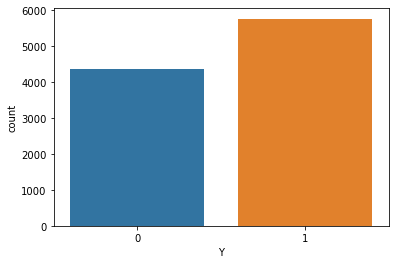

In [14]:
sns.countplot(train['Y'])

We can see from above plot that more users bought coupons

# Outlier Analysis

In [28]:
df = pd.DataFrame(train)
df.columns

Index(['customer_id', 'destination', 'passanger', 'weather', 'temperature',
       'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [29]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return outliers

In [30]:
for column in df[['temperature','customer_id','toCoupon_GEQ15min','toCoupon_GEQ25min','has_children']]:
    detect_outlier(df[column])

Conclusion: This is concluded that there are no outliers in the data. 

# Univariate and Bivariate analysis

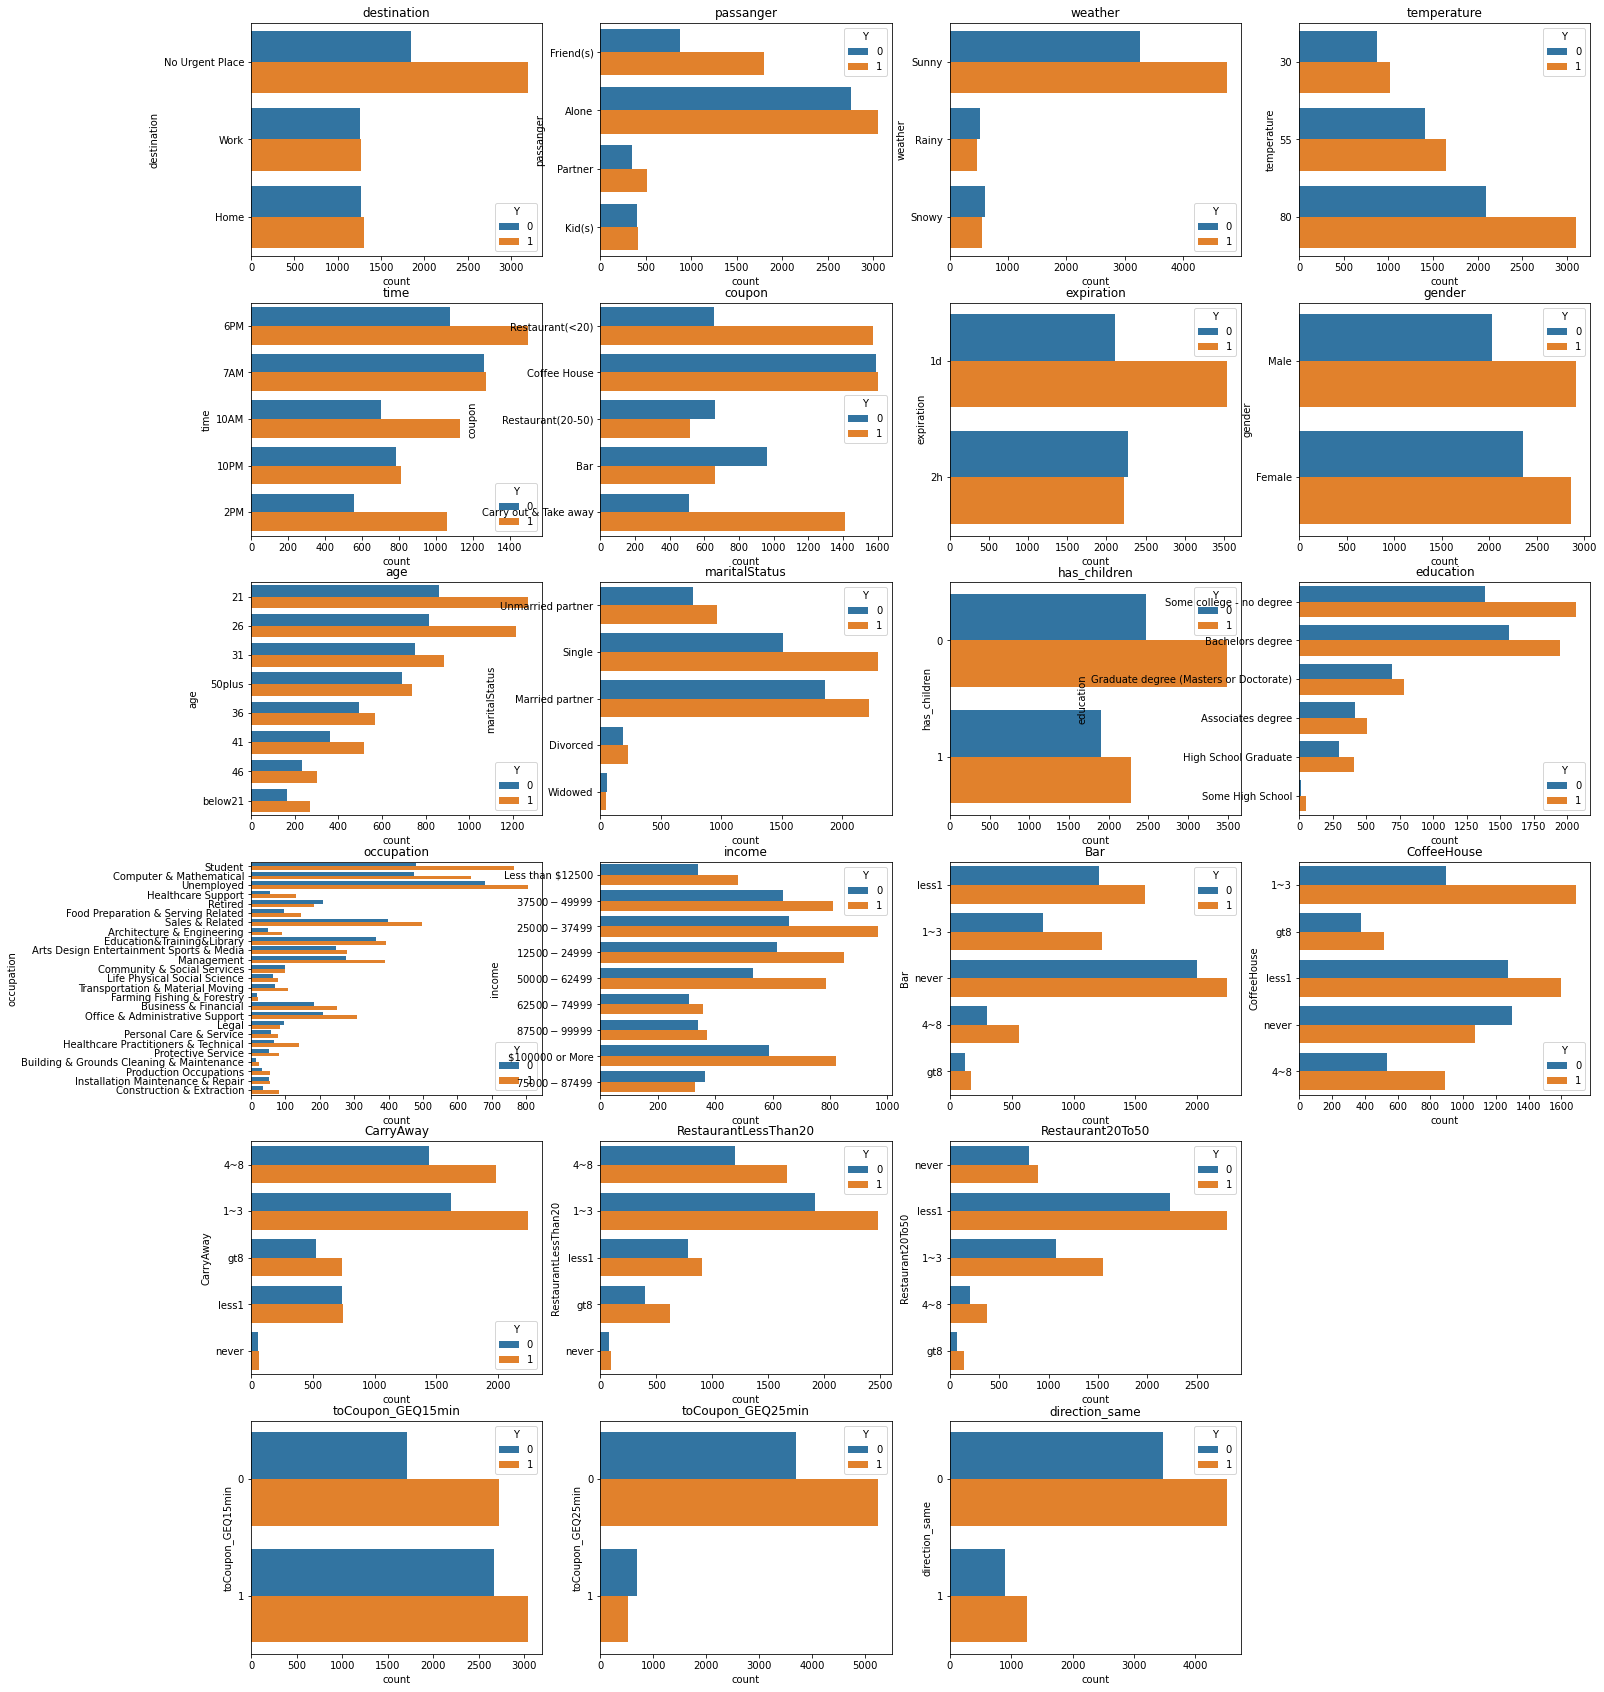

In [15]:
cols_plot = {'destination':1,'passanger':2,'weather':3,'temperature':4,'time':5,'coupon':6,'expiration':7,'gender':8,'age':9,'maritalStatus':10,'has_children':11,'education':12,'occupation':13,'income':14,'Bar':15,'CoffeeHouse':16,'CarryAway':17,'RestaurantLessThan20':18,'Restaurant20To50':19,'toCoupon_GEQ15min':21,  'toCoupon_GEQ25min':22, 'direction_same':23}

fig = plt.figure(figsize=(24,30))

for variable,i in cols_plot.items():
    plt.subplot(6,4,i)
    sns.countplot(y=train[variable],hue=train.Y)
    plt.title(variable)

# Label Encoding for categorical columns

In [16]:
#unique values in categorical columns and ensuring no mistake in data entry
for i in train.columns:
    if train[i].dtype == type(object):
        print(i,end=': ')
        print('\n',train[i].unique())
        print()

destination: 
 ['No Urgent Place' 'Work' 'Home']

passanger: 
 ['Friend(s)' 'Alone' 'Partner' 'Kid(s)']

weather: 
 ['Sunny' 'Rainy' 'Snowy']

time: 
 ['6PM' '7AM' '10AM' '10PM' '2PM']

coupon: 
 ['Restaurant(<20)' 'Coffee House' 'Restaurant(20-50)' 'Bar'
 'Carry out & Take away']

expiration: 
 ['1d' '2h']

gender: 
 ['Male' 'Female']

age: 
 ['21' '26' '31' '50plus' '36' '41' '46' 'below21']

maritalStatus: 
 ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

education: 
 ['Some college - no degree' 'Bachelors degree'
 'Graduate degree (Masters or Doctorate)' 'Associates degree'
 'High School Graduate' 'Some High School']

occupation: 
 ['Student' 'Computer & Mathematical' 'Unemployed' 'Healthcare Support'
 'Retired' 'Food Preparation & Serving Related' 'Sales & Related'
 'Architecture & Engineering' 'Education&Training&Library'
 'Arts Design Entertainment Sports & Media' 'Management'
 'Community & Social Services' 'Life Physical Social Science'
 'Transportation &

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  object
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  Bar                   10147 non-null

In [18]:
columns_to_le = ["weather","destination","passanger","time","gender","coupon","maritalStatus","education",
                 "occupation","income","Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50","expiration",
                "age"]
#Label Encoding the categorical columns

le = LabelEncoder()
for col in columns_to_le:
    train[col] = le.fit_transform(train[col])

In [19]:
train['occupation'].unique() #unique values for occupation after Label Encoding

array([22,  5, 24, 11, 20,  9, 21,  0,  7,  1, 15,  4, 14, 23,  8,  3, 16,
       13, 17, 10, 19,  2, 18, 12,  6])

In [20]:
#Calculate Co-relation wrt to Y
train.corr()['Y'].sort_values(ascending=False)

Y                       1.000000
coupon                  0.096304
weather                 0.093026
temperature             0.053147
passanger               0.051481
education               0.045973
gender                  0.041871
maritalStatus           0.016873
direction_same          0.014182
occupation              0.001004
destination            -0.001158
customer_id            -0.004595
RestaurantLessThan20   -0.008489
direction_opp          -0.014182
income                 -0.033099
age                    -0.033502
has_children           -0.040851
CarryAway              -0.044647
Restaurant20To50       -0.048680
time                   -0.052033
Bar                    -0.078595
toCoupon_GEQ15min      -0.081642
toCoupon_GEQ25min      -0.098778
expiration             -0.133069
CoffeeHouse            -0.143582
Name: Y, dtype: float64

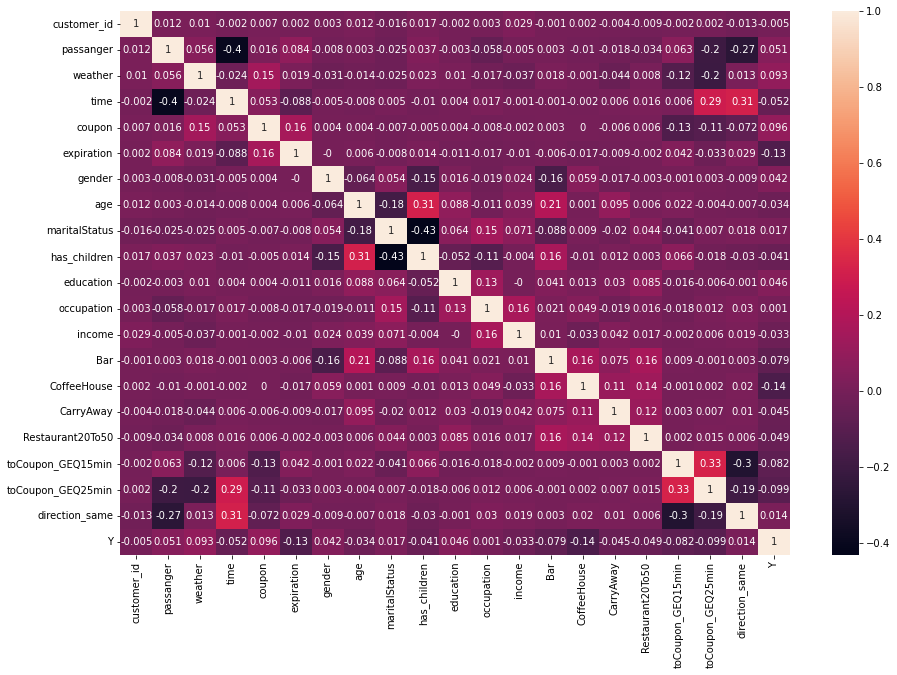

In [85]:
#Calculate the correlation for the dataset
corr = train.corr().round(decimals=3)

#Setting the size of the figure
plt.figure(figsize =(15,10))

#Plot the correlation using heatmap
ax = sns.heatmap(corr, annot=True)

In [22]:
train.drop(['temperature'],axis=1,inplace=True) # strong corelated with weather. remove duplicate
train.drop(['destination'],axis=1,inplace=True)# strong corelated with time. remove duplicate
train.drop(['RestaurantLessThan20'],axis=1,inplace=True)# less corelation
train.drop(['direction_opp'],axis=1,inplace=True) #removed as it has same correlation as direction_same and inverse of it

# Test dataset

Do similar operations on test dataset as done in train

In [23]:
test = pd.read_csv('test.csv')

In [24]:
test.head()

,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,374679,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Female,below21,...,never,1~3,less1,4~8,less1,1,0,0,0,1
1,469678,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21,...,1~3,never,gt8,4~8,1~3,1,1,0,1,0
2,216140,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Female,26,...,never,never,1~3,less1,never,1,1,0,0,1
3,184301,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,50plus,...,never,4~8,4~8,1~3,less1,1,1,0,0,1
4,148720,Work,Alone,Sunny,30,7AM,Carry out & Take away,1d,Female,26,...,never,never,1~3,4~8,less1,1,1,0,0,1


In [25]:
print(test.isnull().sum())

customer_id                0
destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     2513
Bar                       19
CoffeeHouse               45
CarryAway                 29
RestaurantLessThan20      33
Restaurant20To50          41
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
dtype: int64


In [26]:
for column in test[['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']]:
    mode = test[column].mode()[0]
    test[column] = test[column].fillna(mode)

In [27]:
print(test.isnull().sum())

customer_id                0
destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     2513
Bar                        0
CoffeeHouse                0
CarryAway                  0
RestaurantLessThan20       0
Restaurant20To50           0
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
dtype: int64


In [28]:
test.drop(['car'],axis=1,inplace=True) # removed as it has many null values
test.drop(['toCoupon_GEQ5min'],axis=1,inplace=True) #removed as it has same values in entire dataset
test.drop(['direction_opp'],axis=1,inplace=True) #removed as it has same correlation as direction_same and inverse of it

In [29]:
#for col in ("Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"):
#  test[col] = test[col].replace(["less1"], "never")
#test["Bar"].unique()

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           2537 non-null   int64 
 1   destination           2537 non-null   object
 2   passanger             2537 non-null   object
 3   weather               2537 non-null   object
 4   temperature           2537 non-null   int64 
 5   time                  2537 non-null   object
 6   coupon                2537 non-null   object
 7   expiration            2537 non-null   object
 8   gender                2537 non-null   object
 9   age                   2537 non-null   object
 10  maritalStatus         2537 non-null   object
 11  has_children          2537 non-null   int64 
 12  education             2537 non-null   object
 13  occupation            2537 non-null   object
 14  income                2537 non-null   object
 15  Bar                   2537 non-null   

In [31]:
#label encoding in test dataset
for col in columns_to_le:
    test[col] = le.fit_transform(test[col])

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   customer_id           2537 non-null   int64
 1   destination           2537 non-null   int32
 2   passanger             2537 non-null   int32
 3   weather               2537 non-null   int32
 4   temperature           2537 non-null   int64
 5   time                  2537 non-null   int32
 6   coupon                2537 non-null   int32
 7   expiration            2537 non-null   int32
 8   gender                2537 non-null   int32
 9   age                   2537 non-null   int32
 10  maritalStatus         2537 non-null   int32
 11  has_children          2537 non-null   int64
 12  education             2537 non-null   int32
 13  occupation            2537 non-null   int32
 14  income                2537 non-null   int32
 15  Bar                   2537 non-null   int32
 16  Coffee

In [33]:
test.drop(['temperature'],axis=1,inplace=True) # strong corelated with weather. remove duplicate
test.drop(['destination'],axis=1,inplace=True)# strong corelated with time. remove duplicate
test.drop(['RestaurantLessThan20'],axis=1,inplace=True)# less corelation

In [34]:
X_train = train
X_train=X_train.drop(['Y'],axis=1)
X_train

,customer_id,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,258868,1,2,3,4,0,1,0,3,0,5,22,8,3,0,1,4,1,0,0
1,318369,0,2,4,4,1,1,0,2,0,1,22,3,3,0,1,3,0,0,1
2,320906,0,2,0,2,1,0,0,1,0,5,22,8,3,2,1,0,1,0,0
3,412393,0,0,4,4,1,0,1,2,0,1,5,2,3,3,1,4,1,1,0
4,290854,0,1,3,2,0,1,2,2,0,5,24,1,0,3,1,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,201838,0,2,3,1,1,1,7,2,0,5,22,8,4,2,2,3,1,0,1
10143,248838,3,2,3,2,0,1,1,1,0,1,7,3,4,3,0,3,0,0,1
10144,173367,0,2,0,4,1,0,0,3,0,5,16,2,4,4,0,4,0,0,0
10145,488688,2,2,1,3,1,1,5,1,1,1,4,0,3,4,0,0,0,0,0


In [35]:
Y_train = train['Y']
Y_train

0        1
1        0
2        0
3        0
4        0
        ..
10142    0
10143    1
10144    1
10145    0
10146    0
Name: Y, Length: 10147, dtype: int64

In [36]:
X_test = test

In [37]:
#Removing irrelavant columns
X_train=X_train.drop(['direction_same'],axis=1)
X_train=X_train.drop(['customer_id'],axis=1)
X_test1 = X_test.drop(['customer_id','direction_same'],axis=1)

# Random Forest Classification

In [38]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [39]:
y_pred = clf.predict(X_test1)

In [40]:
y_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [41]:
Cust_id = X_test.customer_id
Cust_id.dtype

dtype('int64')

In [42]:
final = pd.DataFrame({'Customer_id':Cust_id, 'Y':y_pred})

In [43]:
final

,Customer_id,Y
0,374679,1
1,469678,1
2,216140,0
3,184301,0
4,148720,1
...,...,...
2532,356045,0
2533,498759,1
2534,356159,0
2535,218541,0


In [44]:
#Feature Importance of RDT
pd.Series(clf.feature_importances_ ,index = X_train.columns).sort_values(ascending=False)

coupon               0.131378
occupation           0.096933
time                 0.085661
income               0.082465
age                  0.071785
CoffeeHouse          0.067100
Bar                  0.056952
education            0.054646
CarryAway            0.051446
Restaurant20To50     0.048571
passanger            0.046070
maritalStatus        0.044187
expiration           0.034895
weather              0.031931
toCoupon_GEQ15min    0.031873
gender               0.026199
has_children         0.021415
toCoupon_GEQ25min    0.016493
dtype: float64

### LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg = LogisticRegression()

In [47]:
logreg.fit(X_train,Y_train)

LogisticRegression()

In [48]:
y_pred_logreg=logreg.predict(X_test1)

In [49]:
pd.DataFrame({'Customer_id':Cust_id, 'Y':y_pred})

,Customer_id,Y
0,374679,1
1,469678,1
2,216140,0
3,184301,0
4,148720,1
...,...,...
2532,356045,0
2533,498759,1
2534,356159,0
2535,218541,0


# Decision Trees with GridSearchCV

In [50]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(random_state = 100)
dectree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=100)

In [51]:
y_predict_dtree = dectree.predict(X_test1)

In [52]:
params = {'max_depth':list(range(2,5)), 'criterion':['gini', 'entropy'],'min_samples_split' :[2,5,10],'min_samples_leaf':[2,4]}

In [53]:
from sklearn.model_selection import GridSearchCV
cv_gs = GridSearchCV(dectree, param_grid = params, cv = 5, scoring = 'f1')

In [54]:
cv_gs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [88]:
cv_gs.best_score_

0.7506830757412979

In [55]:
print(cv_gs.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [56]:
dectree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 4,min_samples_split=2,
                                 random_state = 100)
dectree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       random_state=100)

In [57]:
y_predict_dtree = dectree.predict(X_test1)

In [58]:
Cust_id = X_test.customer_id

In [59]:
decpd = pd.DataFrame({'Customer_id':Cust_id, 'Y':y_predict_dtree})
# saving the dataframe
#decpd.to_csv('C:/Users/91963/OneDrive/Desktop/IIT ML Course/Hackathon/dec.csv')

In [60]:
pd.Series(dectree.feature_importances_ ,index = X_train.columns).sort_values(ascending=False)

coupon               0.558220
CoffeeHouse          0.130656
toCoupon_GEQ25min    0.109767
Bar                  0.098180
expiration           0.044977
passanger            0.020793
time                 0.018558
income               0.011631
occupation           0.007217
age                  0.000000
maritalStatus        0.000000
has_children         0.000000
weather              0.000000
gender               0.000000
CarryAway            0.000000
Restaurant20To50     0.000000
toCoupon_GEQ15min    0.000000
education            0.000000
dtype: float64

# Random Forest with GridSearchCV

In [61]:
tune_rf = RandomForestClassifier(random_state=100)
params1 = {'n_estimators':[200,300,700],'max_features' : ['sqrt','log']}
cv_model2 = GridSearchCV(tune_rf, param_grid = params1,scoring = 'f1')
cv_model2.fit(X_train,Y_train)
print(cv_model2.best_params_)

{'max_features': 'sqrt', 'n_estimators': 700}


In [62]:
cv_model2.best_score_

0.7928490636726953

In [63]:
cv_model2.best_estimator_

RandomForestClassifier(n_estimators=700, random_state=100)

In [64]:
rf_T = RandomForestClassifier(n_estimators=700, max_features ='sqrt',random_state=100)
rf_T.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=700, random_state=100)

In [65]:
y_pred_RT_GV = rf_T.predict(X_test1)

In [66]:
rtpd = pd.DataFrame({'Customer_id':Cust_id, 'Y':y_pred_RT_GV})
#rtpd.to_csv('C:/Users/91963/OneDrive/Desktop/IIT ML Course/Hackathon/RTF1.csv')

In [67]:
pd.Series(rf_T.feature_importances_ ,index = X_train.columns).sort_values(ascending=False)

coupon               0.132480
occupation           0.096310
time                 0.087276
income               0.082647
age                  0.071325
CoffeeHouse          0.067504
Bar                  0.056037
education            0.054494
CarryAway            0.051738
Restaurant20To50     0.048654
passanger            0.045355
maritalStatus        0.044289
expiration           0.034109
toCoupon_GEQ15min    0.033019
weather              0.030958
gender               0.026105
has_children         0.021111
toCoupon_GEQ25min    0.016590
dtype: float64

# Random Classifier

In [68]:
from sklearn.model_selection import RandomizedSearchCV
RTmodel = RandomForestClassifier()
param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100, 200, 300, 400],
              'max_features' : ['sqrt','log']}
random_rf = RandomizedSearchCV(estimator=RTmodel, param_distributions=param_vals,
                              n_iter=10, scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1)

#Training and prediction

random_rf.fit(X_train, Y_train)
print(random_rf.best_params_)
print(random_rf.best_estimator_)
#preds = random_rf.best_estimator_.predict(X_test)

{'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 1100}
RandomForestClassifier(max_depth=1100, n_estimators=400)


In [69]:
rf_RT = RandomForestClassifier(n_estimators=400, max_features ='sqrt',random_state=100,max_depth=200)
rf_RT.fit(X_train,Y_train)

RandomForestClassifier(max_depth=200, n_estimators=400, random_state=100)

In [70]:
random_rf.best_score_

0.7533267619517005

In [71]:
y_pred_RS_GV = rf_RT.predict(X_test1)

In [72]:
rtpd1 = pd.DataFrame({'Customer_id':Cust_id, 'Y':y_pred_RS_GV})
#rtpd1.to_csv('C:/Users/91963/OneDrive/Desktop/IIT ML Course/Hackathon/RT1.csv')

In [73]:
pd.Series(rf_RT.feature_importances_ ,index = X_train.columns).sort_values(ascending=False)

coupon               0.131478
occupation           0.096539
time                 0.087197
income               0.082741
age                  0.071078
CoffeeHouse          0.068070
Bar                  0.056059
education            0.054607
CarryAway            0.051655
Restaurant20To50     0.048974
passanger            0.045051
maritalStatus        0.044610
expiration           0.034112
toCoupon_GEQ15min    0.032943
weather              0.030821
gender               0.026096
has_children         0.021172
toCoupon_GEQ25min    0.016798
dtype: float64

# Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,Y_train)

GradientBoostingClassifier()

In [76]:
y_pred_hgbt=gradient_booster.predict(X_test1)

In [77]:
hgbtpd1 = pd.DataFrame({'Customer_id':Cust_id, 'Y':y_pred_hgbt})
#hgbtpd1.to_csv('C:/Users/91963/OneDrive/Desktop/IIT ML Course/Hackathon/HGBT.csv')

In [78]:
pd.Series(gradient_booster.feature_importances_ ,index = X_train.columns).sort_values(ascending=False)

coupon               0.341514
CoffeeHouse          0.110083
Bar                  0.104139
expiration           0.092911
time                 0.077038
passanger            0.042462
weather              0.032415
toCoupon_GEQ25min    0.031324
occupation           0.029310
maritalStatus        0.027358
age                  0.022358
education            0.021344
income               0.019245
toCoupon_GEQ15min    0.013555
gender               0.011065
Restaurant20To50     0.010813
CarryAway            0.008120
has_children         0.004946
dtype: float64

In [79]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='f1',n_jobs=4, cv=5)

In [80]:
gsearch3.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=9,
                                                  max_features='sqrt',
                                                  n_estimators=60,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'min_samples_leaf': range(30, 71, 10),
                         'min_samples_split': range(1000, 2100, 200)},
             scoring='f1')

In [81]:
y_pred_hgbt1=gradient_booster.predict(X_test1)

In [82]:
hgbtpd1 = pd.DataFrame({'Customer_id':Cust_id, 'Y':y_pred_hgbt})
#hgbtpd1.to_csv('C:/Users/91963/OneDrive/Desktop/IIT ML Course/Hackathon/HGBT2.csv')

In [83]:
gsearch3.best_score_

0.7573917723636809

# Conclusion

In [89]:
table = pd.DataFrame({'Algorithm':['Decision Trees with GridSearchCV','Random Forest with GridSearchCV','Random Forest with Random Classifier','Gradient Boosting with GridSearchCV'], 
                      'Score':[cv_gs.best_score_,cv_model2.best_score_,random_rf.best_score_,gsearch3.best_score_]})
table

,Algorithm,Score
0,Decision Trees with GridSearchCV,0.750683
1,Random Forest with GridSearchCV,0.792849
2,Random Forest with Random Classifier,0.753327
3,Gradient Boosting with GridSearchCV,0.757392


# We can conclude the best algorithm with highest score in prediction is Random Forest with GridSearchCV with score of 0.792849